<a href="https://colab.research.google.com/github/iAmHira19/Connected-Component-Extraction/blob/main/uploading%20Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of connected components: 260


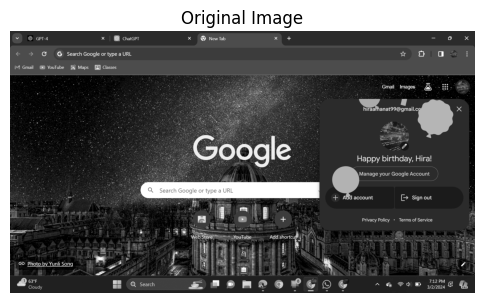

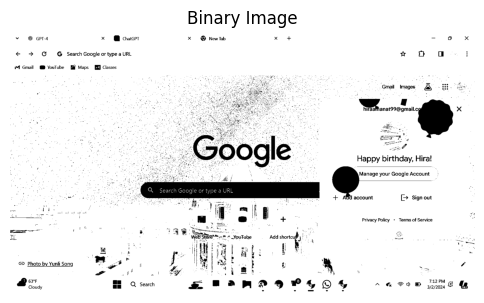

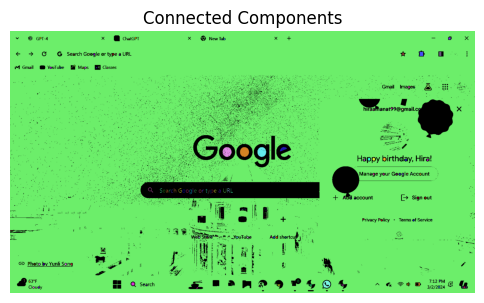

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = '/content/Screenshot 2024-03-02 191255.png'  # Replace with your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Threshold the image to create a binary image
_, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# Invert the image if needed, so that the foreground is white and the background is black
binary_img = cv2.bitwise_not(binary_img)

# Apply connected components analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_img, connectivity=8)

# Print the number of connected components found
print("Number of connected components:", num_labels - 1)  # Exclude the background component

# Display each connected component with a different color
output_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
for label in range(1, num_labels):  # Start from 1 to skip the background
    mask = labels == label
    output_img[mask] = np.random.randint(0, 255, 3)  # Assign a random color to each component

# Function to display images inline
def display_image(image, title="Image"):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display the original and connected components images
display_image(img, title="Original Image")
display_image(binary_img, title="Binary Image")
display_image(output_img, title="Connected Components")

Please upload a grayscale image.


Saving Screenshot 2024-03-02 191255.png to Screenshot 2024-03-02 191255 (1).png
Number of connected components (excluding background): 258


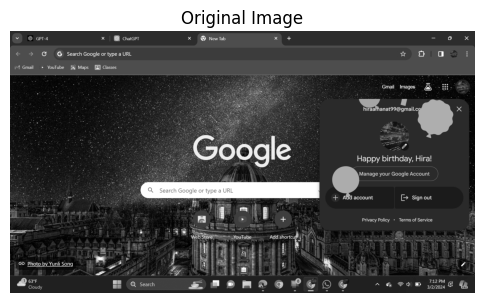

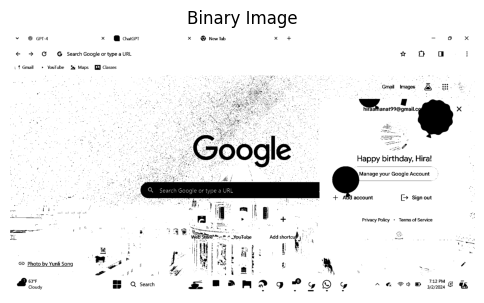

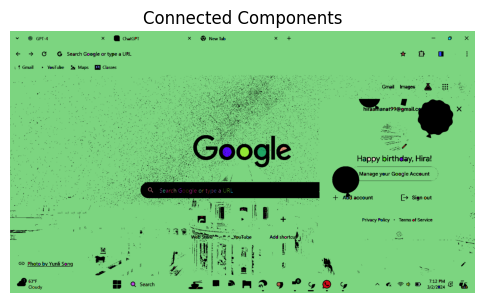

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image

# Step 1: Prompt the user to upload an image file
print("Please upload a grayscale image.")
uploaded = files.upload()

# Step 2: Load the image in grayscale mode
# The uploaded file is a dictionary where keys are filenames and values are file objects
image_path = next(iter(uploaded))  # Get the uploaded image file name
img = Image.open(BytesIO(uploaded[image_path])).convert("L")  # Open and convert to grayscale
img = np.array(img)  # Convert image to a numpy array compatible with OpenCV

# Step 3: Apply binary thresholding to the image
# This converts the grayscale image to a binary image (black and white).
_, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# Step 4: Invert the binary image if needed to ensure the background is black and the foreground is white
binary_img = cv2.bitwise_not(binary_img)

# Step 5: Apply connected components analysis
# Here, `connectivity=8` means each pixel is connected to its 8 neighbors.
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_img, connectivity=8)

# Step 6: Print the number of detected components excluding the background
print("Number of connected components (excluding background):", num_labels - 1)

# Step 7: Create an output image to display each component in a unique color
output_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
for label in range(1, num_labels):  # Start from 1 to skip the background
    mask = labels == label
    output_img[mask] = np.random.randint(0, 255, 3)  # Assign a random color to each component

# Step 8: Define a function to display images with titles
def display_image(image, title="Image"):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 9: Display the original, binary, and connected components images
display_image(img, title="Original Image")
display_image(binary_img, title="Binary Image")
display_image(output_img, title="Connected Components")
